# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([ 7.82117727e-01,  1.99541693e-01,  4.82131266e-01, -1.58005470e+00,
        9.97305019e-01,  1.89276809e+00, -2.38161119e+00, -6.76528239e-01,
       -6.23308476e-02, -8.08416265e-01,  1.24281096e+00,  7.51759662e-01,
        2.15549766e+00, -4.54134440e-01,  5.61603979e-01,  2.56377689e-01,
        9.98003639e-02, -1.21048799e+00, -6.52194328e-01,  7.73603544e-01,
        1.41016480e+00,  1.07435210e+00, -4.07530478e-01, -3.05558367e-01,
        1.00965570e+00, -3.41630032e-01, -9.02093747e-01, -1.18074945e+00,
        7.12851057e-01,  7.49552029e-01, -4.49301892e-01,  1.02252782e+00,
       -6.81320662e-01,  6.28151722e-01, -2.78307705e-01, -1.06437021e-03,
       -1.17999435e+00,  2.39685535e-01, -1.05195974e+00,  3.73942493e-02,
        4.29030812e-01,  8.96609672e-02,  2.97628403e-02, -2.82380697e-02,
        6.20440581e-01, -1.45286027e+00,  6.70653278e-01,  2.46854247e+00,
       -8.89294171e-02, -1.39460841e-01,  6.33817480e-01, -7.03826216e-01,
        5.58588408e-01, -

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

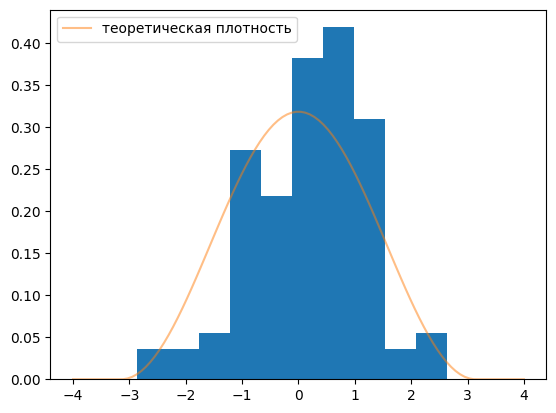

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.17061801017239464
1.0204816209313465


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

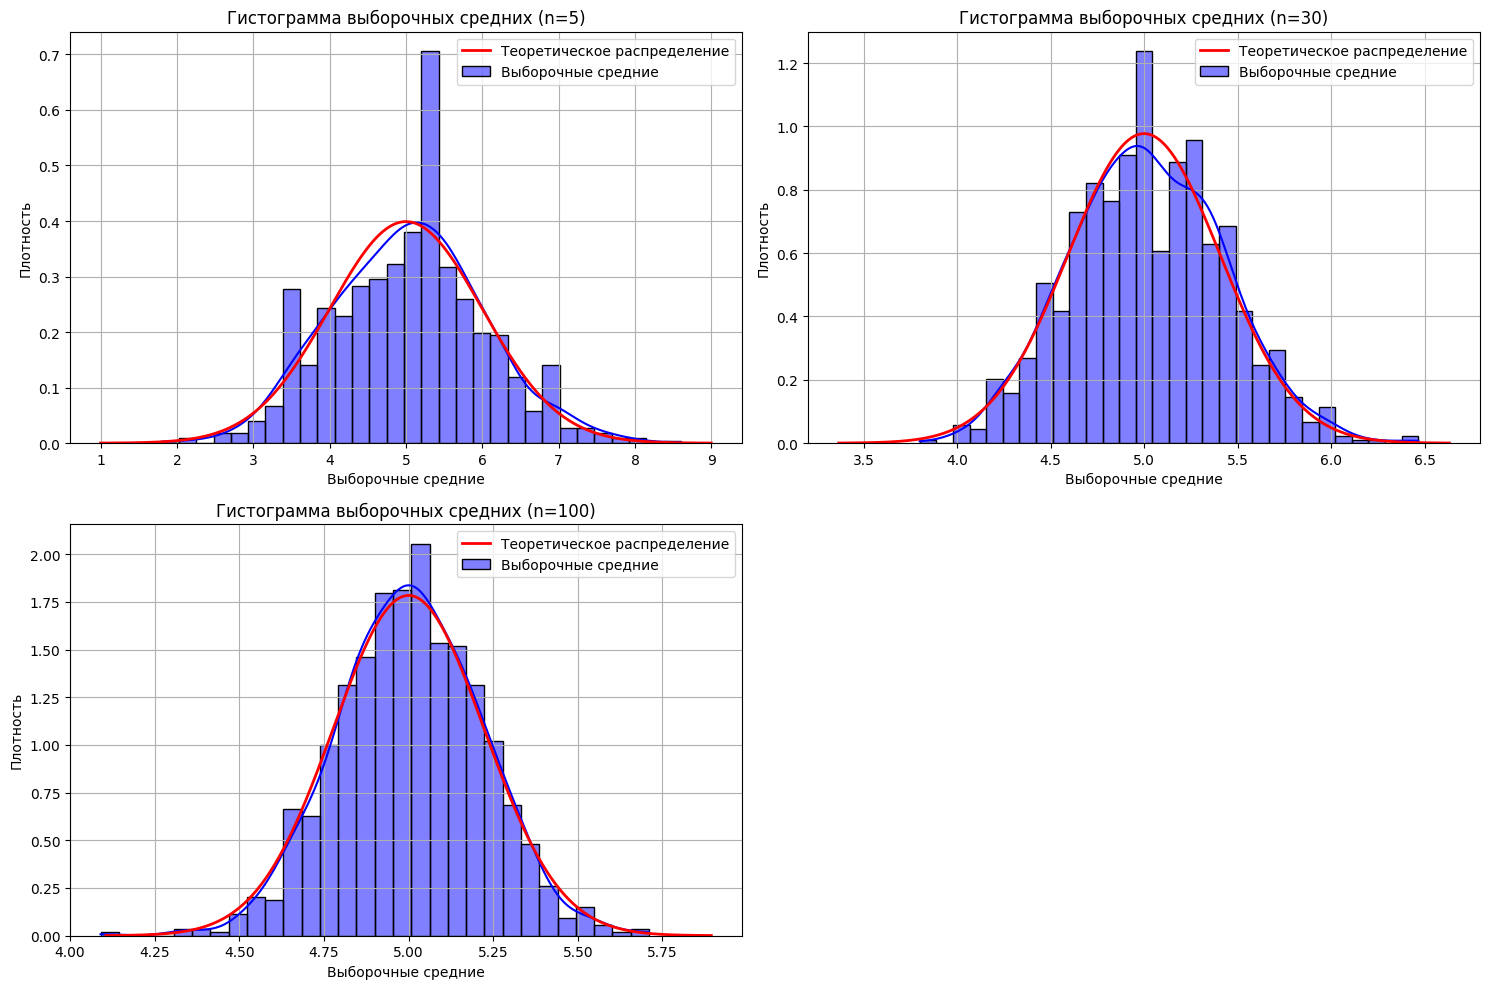

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

# Установка параметров
np.random.seed(42)  # Для воспроизводимости
n_samples = 1000  # Количество выборок
sample_sizes = [5, 30, 100]  # Различные размеры выборок
lambda_param = 5  # Параметр для распределения Пуассона

# Генерация данных из распределения Пуассона
data = np.random.poisson(lam=lambda_param, size=10000)

# Функция для расчета выборочных средних
def calculate_sample_means(data, n_samples, sample_size):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))
    return sample_means

# Подготовка к визуализации
plt.figure(figsize=(15, 10))

# Рассчитываем и визуализируем выборочные средние для разных объемов выборок
for sample_size in sample_sizes:
    sample_means = calculate_sample_means(data, n_samples, sample_size)
    
    # Теоретические параметры
    mu = lambda_param  # Математическое ожидание для распределения Пуассона
    sigma_squared = lambda_param  # Дисперсия для распределения Пуассона
    sigma = np.sqrt(sigma_squared)
    
    # Теоретическое распределение выборочных средних
    theoretical_mean = mu
    theoretical_std = sigma / np.sqrt(sample_size)
    
    # Гистограмма выборочных средних
    plt.subplot(2, 2, sample_sizes.index(sample_size) + 1)
    sns.histplot(sample_means, bins=30, kde=True, stat="density", label='Выборочные средние', color='blue')
    
    # Построение теоретического распределения
    x = np.linspace(theoretical_mean - 4 * theoretical_std, theoretical_mean + 4 * theoretical_std, 1000)
    plt.plot(x, norm.pdf(x, theoretical_mean, theoretical_std), color='red', label='Теоретическое распределение', lw=2)
    
    plt.title(f'Гистограмма выборочных средних (n={sample_size})')
    plt.xlabel('Выборочные средние')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [20]:
#Апроксимация распределения выборочного среднего по центральной предельной теореме (ЦПТ) обычно работает хорошо, если выполнены определённые условия.
# Для распределения Пуассона апроксимация распределения выборочного среднего работает хорошо при больших объемах выборок. 
# В малых выборках может наблюдаться отклонение от нормальности, особенно при небольших значениях λ.


## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import _zconfint_generic

In [11]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
# Проверка наличия колонки Churn
if 'churn' in df.columns:
    print("Колонка 'Churn' присутствует.")
else:
    print("Колонка 'Churn' отсутствует.")

Колонка 'Churn' присутствует.


In [17]:
import pandas as pd
import numpy as np
import statsmodels.stats.weightstats as st
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://drive.google.com/uc?id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8"
data = pd.read_csv(url)

# Просмотр первых строк данных
print(data.head())

# Группировка данных по churn
grouped = data.groupby('churn')['total day calls']

# Рассчитываем среднее и стандартное отклонение для каждой группы
means = grouped.mean()
stds = grouped.std(ddof=1)  # Используем ddof=1 для несмещенной оценки
n = grouped.count()  # Количество наблюдений в каждой группе

# Уровень доверия
confidence_level = 0.95
z_value = 1.96  # Z-значение для 95% доверительного интервала

# Доверительные интервалы с явной формулой
conf_intervals_manual = {
    'churn': [],
    'mean': [],
    'lower_bound': [],
    'upper_bound': []
}

for churn_val in grouped.groups.keys():
    mean = means[churn_val]
    std = stds[churn_val]
    margin_of_error = z_value * (std / np.sqrt(n[churn_val]))
    
    conf_intervals_manual['churn'].append(churn_val)
    conf_intervals_manual['mean'].append(mean)
    conf_intervals_manual['lower_bound'].append(mean - margin_of_error)
    conf_intervals_manual['upper_bound'].append(mean + margin_of_error)

conf_intervals_manual = pd.DataFrame(conf_intervals_manual)

# Доверительные интервалы с использованием statsmodels
conf_intervals_statsmodels = {
    'churn': [],
    'mean': [],
    'lower_bound': [],
    'upper_bound': []
}

for churn_val in grouped.groups.keys():
    mean = means[churn_val]
    data_for_group = grouped.get_group(churn_val)
    
    # Используем DescrStatsW для расчета доверительных интервалов
    stats = st.DescrStatsW(data_for_group)
    conf_int = stats.tconfint_mean(alpha=1 - confidence_level)
    
    conf_intervals_statsmodels['churn'].append(churn_val)
    conf_intervals_statsmodels['mean'].append(mean)
    conf_intervals_statsmodels['lower_bound'].append(conf_int[0])
    conf_intervals_statsmodels['upper_bound'].append(conf_int[1])

conf_intervals_statsmodels = pd.DataFrame(conf_intervals_statsmodels)

# Выводим результаты
print("Доверительные интервалы с явной формулой:")
print(conf_intervals_manual)

print("\nДоверительные интервалы с использованием statsmodels:")
print(conf_intervals_statsmodels)

#


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           